In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split # 학습용과 테스트용 데이터로 분리해주는 함수
from sklearn.linear_model import LinearRegression # 선형회귀 모델
from sklearn.metrics import mean_squared_error # 잔차 에러 평균, 오차제곱평균, 정확도 측정지표
from sklearn.metrics import accuracy_score # 모델 예측 정확도 측정 함수
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀보델 임포트
plt.rcParams['font.family'] = 'D2Coding'

In [2]:
gonjang = pd.read_csv('한국동서발전(주)_발전소 주변 기상 및 대기질 정보_20221231.csv', encoding='cp949')
gonjang

,연도,기준항목,미세먼지,초미세먼지,오존(ppb),이산화질소(ppb),일산화탄소(ppb),아황산가스(ppb)
0,2020,당진발전본부(교로),41,17.00,40.253,40.018,0.00,2.099
1,2020,석문중(삼봉),30,20.00,45.836,15.135,0.00,3.794
2,2020,석문면(통정),26,18.00,34.790,9.066,0.00,2.200
3,2020,당진에코파워,39,20.00,33.341,10.572,0.00,2.312
4,2020,변전소(사관),30,13.00,34.034,5.725,0.00,2.470
5,2020,종합운동장(진관),278,149.00,27.294,7.678,0.00,1.815
6,2020,적서리,264,139.00,37.434,5.801,0.00,2.353
7,2020,송악초(중흥),120,195.00,35.296,9.259,0.00,2.362
8,2020,면천면(성상),273,144.00,31.201,9.535,0.00,2.018
9,2020,합덕읍(운산),320,151.00,31.833,8.296,0.00,2.142


In [3]:
g2020 = gonjang[gonjang['연도'] == 2020]
g2020

,연도,기준항목,미세먼지,초미세먼지,오존(ppb),이산화질소(ppb),일산화탄소(ppb),아황산가스(ppb)
0,2020,당진발전본부(교로),41,17.00,40.253,40.018,0.00,2.099
1,2020,석문중(삼봉),30,20.00,45.836,15.135,0.00,3.794
2,2020,석문면(통정),26,18.00,34.790,9.066,0.00,2.200
3,2020,당진에코파워,39,20.00,33.341,10.572,0.00,2.312
4,2020,변전소(사관),30,13.00,34.034,5.725,0.00,2.470
5,2020,종합운동장(진관),278,149.00,27.294,7.678,0.00,1.815
6,2020,적서리,264,139.00,37.434,5.801,0.00,2.353
7,2020,송악초(중흥),120,195.00,35.296,9.259,0.00,2.362
8,2020,면천면(성상),273,144.00,31.201,9.535,0.00,2.018
9,2020,합덕읍(운산),320,151.00,31.833,8.296,0.00,2.142


In [4]:
g2021 = gonjang[gonjang['연도'] == 2021]
g2021

,연도,기준항목,미세먼지,초미세먼지,오존(ppb),이산화질소(ppb),일산화탄소(ppb),아황산가스(ppb)
14,2021,당진발전본부(교로),36,16.00,34.334,0.005,0.48,0.000
15,2021,석문중(삼봉),17,9.00,19.979,0.009,0.45,0.001
16,2021,석문면(통정),26,15.00,2.829,0.011,0.50,0.000
17,2021,당진에코파워,22,12.00,28.178,0.006,0.36,0.000
18,2021,변전소(사관),27,3.00,21.027,0.006,0.12,0.000
19,2021,종합운동장(진관),105,52.00,26.437,8.543,0.34,1.960
20,2021,적서리,163,77.00,31.592,6.348,0.44,3.130
21,2021,송악초(중흥),178,312.00,36.686,10.262,0.00,3.676
22,2021,면천면(성상),959,94.00,28.645,9.872,0.48,2.932
23,2021,합덕읍(운산),126,67.00,17.553,8.679,0.45,3.588


In [5]:
g2022 = gonjang[gonjang['연도'] == 2022]
g2022

,연도,기준항목,미세먼지,초미세먼지,오존(ppb),이산화질소(ppb),일산화탄소(ppb),아황산가스(ppb)
28,2022,당진발전본부(교로),33,17.0,0.045,0.013,0.35,0.002
29,2022,석문중(삼봉),32,16.0,0.034,0.009,0.38,0.002
30,2022,석문면(통정),29,17.0,0.038,0.010,0.39,0.002
31,2022,당진에코파워,29,17.0,0.038,0.013,0.35,0.002
32,2022,변전소(사관),28,16.0,0.040,0.007,0.36,0.002
33,2022,종합운동장(진관),38,29.0,6.134,2.518,0.23,0.440
34,2022,적서리,31,19.0,12.252,2.262,0.43,16.161
35,2022,송악초(중흥),75,17.0,1.043,0.141,0.32,0.144
36,2022,면천면(성상),45,27.0,11.896,4.473,0.37,1.476
37,2022,합덕읍(운산),39,54.0,10.265,2.967,0.35,0.647


In [6]:
g2020.reset_index(drop=True, inplace=True)
g2021.reset_index(drop=True, inplace=True)
g2022.reset_index(drop=True, inplace=True)

In [7]:
g2020

,연도,기준항목,미세먼지,초미세먼지,오존(ppb),이산화질소(ppb),일산화탄소(ppb),아황산가스(ppb)
0,2020,당진발전본부(교로),41,17.00,40.253,40.018,0.00,2.099
1,2020,석문중(삼봉),30,20.00,45.836,15.135,0.00,3.794
2,2020,석문면(통정),26,18.00,34.790,9.066,0.00,2.200
3,2020,당진에코파워,39,20.00,33.341,10.572,0.00,2.312
4,2020,변전소(사관),30,13.00,34.034,5.725,0.00,2.470
5,2020,종합운동장(진관),278,149.00,27.294,7.678,0.00,1.815
6,2020,적서리,264,139.00,37.434,5.801,0.00,2.353
7,2020,송악초(중흥),120,195.00,35.296,9.259,0.00,2.362
8,2020,면천면(성상),273,144.00,31.201,9.535,0.00,2.018
9,2020,합덕읍(운산),320,151.00,31.833,8.296,0.00,2.142


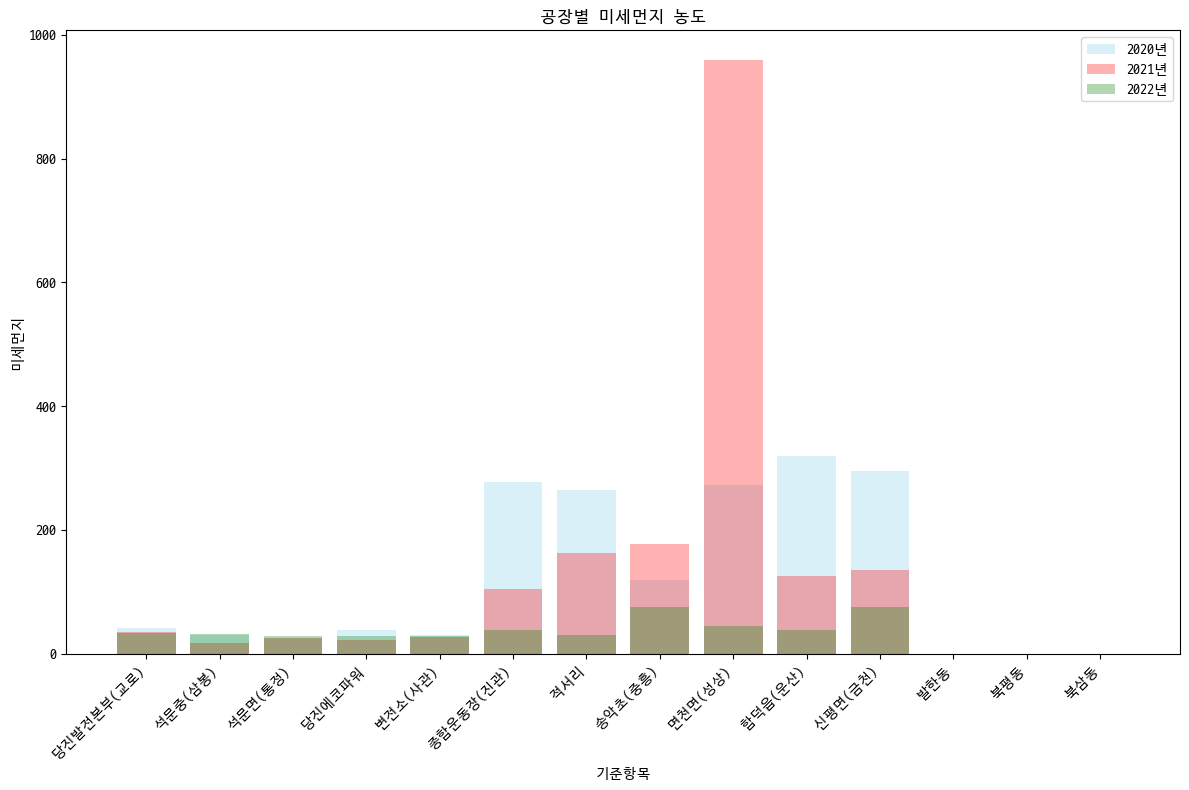

In [8]:
# Bar graph creation
plt.figure(figsize=(12, 8))
plt.bar(g2020['기준항목'], g2020['미세먼지'], color='skyblue', alpha=0.3, label='2020년')
plt.bar(g2021['기준항목'], g2021['미세먼지'], color='red', alpha=0.3, label='2021년')
plt.bar(g2022['기준항목'], g2022['미세먼지'], color='g', alpha=0.3, label='2022년')
plt.xlabel('기준항목')
plt.ylabel('미세먼지')
plt.title('공장별 미세먼지 농도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()

# Display the graph
plt.show()

In [9]:
mimun = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_20240619163513.csv', encoding='cp949')
mimun

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,총계,소계,39,38,40,41,34,34,20,24,...,42,39,33,22,22,19,22,26,39,35
1,서울특별시,서울특별시,42,41,45,44,35,36,21,23,...,41,45,33,22,25,20,22,25,39,38
2,부산광역시,부산광역시,32,34,33,36,32,27,18,31,...,38,32,31,19,20,19,20,21,33,30
3,대구광역시,대구광역시,37,38,38,39,38,35,22,25,...,42,36,33,22,20,18,20,24,41,35
4,인천광역시,인천광역시,42,37,41,39,31,32,21,24,...,42,44,32,21,26,21,26,30,41,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,경상남도,합천,25,26,27,29,29,29,17,27,...,30,29,30,23,24,22,20,20,29,28
168,경상남도,도평균,29,32,31,33,32,29,20,29,...,34,29,29,19,21,19,20,21,31,28
169,제주특별자치도,제주,35,38,39,44,38,28,21,24,...,42,32,29,20,18,17,28,27,34,32
170,제주특별자치도,서귀포,29,32,33,40,35,27,19,32,...,39,30,28,22,23,19,28,24,27,25


In [10]:
당진 = mimun[mimun['구분(2)'] == '당진']

In [11]:
당진.reset_index(drop=True, inplace=True)

In [12]:
당진

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,충청남도,당진,53,52,59,54,44,42,28,25,...,56,56,45,31,35,21,30,38,50,39


In [13]:
dangjin = 당진.iloc[:, 2:].copy()

In [66]:
dangjin1 = dangjin.transpose().reset_index()

In [67]:
dangjin1

,index,0
0,2020.01,53
1,2020.02,52
2,2020.03,59
3,2020.04,54
4,2020.05,44
5,2020.06,42
6,2020.07,28
7,2020.08,25
8,2020.09,29
9,2020.10,47


In [16]:
# 그래프 그리기
plt.figure(figsize=(14, 8))
plt.plot(당진['날짜'], 당진['미세먼지'], marker='o', linestyle='-', color='b')
plt.xlabel('날짜')
plt.ylabel('미세먼지 농도')
plt.title('당진의 월별 미세먼지 농도')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 출력
plt.show()

KeyError: '날짜'

<Figure size 1400x800 with 0 Axes>

In [31]:
당진.transpose()

,0
구분(1),충청남도
구분(2),당진
2020.01,53
2020.02,52
2020.03,59
2020.04,54
2020.05,44
2020.06,42
2020.07,28
2020.08,25


In [68]:
dangjin1.columns = ['날짜', '미세먼지 농도']

In [69]:
dangjin1

,날짜,미세먼지 농도
0,2020.01,53
1,2020.02,52
2,2020.03,59
3,2020.04,54
4,2020.05,44
5,2020.06,42
6,2020.07,28
7,2020.08,25
8,2020.09,29
9,2020.10,47


In [34]:
dangjin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   날짜       36 non-null     object
 1   미세먼지 농도  36 non-null     object
dtypes: object(2)
memory usage: 704.0+ bytes


In [70]:
dangjin1['날짜'] = pd.to_datetime(dangjin1['날짜'])

C:\Users\human\AppData\Local\Temp\ipykernel_21724\2040800938.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dangjin1['날짜'] = pd.to_datetime(dangjin1['날짜'])


In [71]:
dangjin1['미세먼지 농도'] = dangjin1['미세먼지 농도'].replace('56**', '56')

In [72]:
dangjin1.reset_index(drop=False, inplace=True)

In [73]:
dangjin1

,index,날짜,미세먼지 농도
0,0,2020-01-01,53
1,1,2020-02-01,52
2,2,2020-03-01,59
3,3,2020-04-01,54
4,4,2020-05-01,44
5,5,2020-06-01,42
6,6,2020-07-01,28
7,7,2020-08-01,25
8,8,2020-09-01,29
9,9,2020-10-01,47


In [60]:
# '날짜' 열을 datetime 형식으로 변환
dangjin1['날짜'] = pd.to_datetime(dangjin1['날짜'])

# '날짜' 열을 '년-월' 형식으로 변환
dangjin1['년-월'] = dangjin1['날짜'].dt.to_period('M')

# '년-월'을 인덱스로 설정
dangjin1.set_index('년-월', inplace=True)

# 기존 index 열을 제거
dangjin1.drop(columns=['index'], inplace=True)

dangjin1

,날짜,미세먼지 농도
년-월,,
2020-01,2020-01-01,53
2020-02,2020-02-01,52
2020-03,2020-03-01,59
2020-04,2020-04-01,54
2020-05,2020-05-01,44
2020-06,2020-06-01,42
2020-07,2020-07-01,28
2020-08,2020-08-01,25
2020-09,2020-09-01,29


In [74]:
dangjin1['미세먼지 농도'] = dangjin1['미세먼지 농도'].astype(int)

In [43]:
dangjin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       36 non-null     datetime64[ns]
 1   미세먼지 농도  36 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 560.0 bytes


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

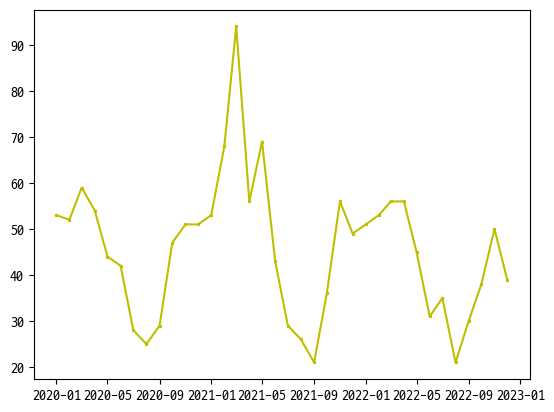

In [63]:
plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', marker='*', markersize=2, label='미세먼지 농도')
plt.xticks(dangjin1.index['년-월'], rotation=90)
plt.title('당진 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

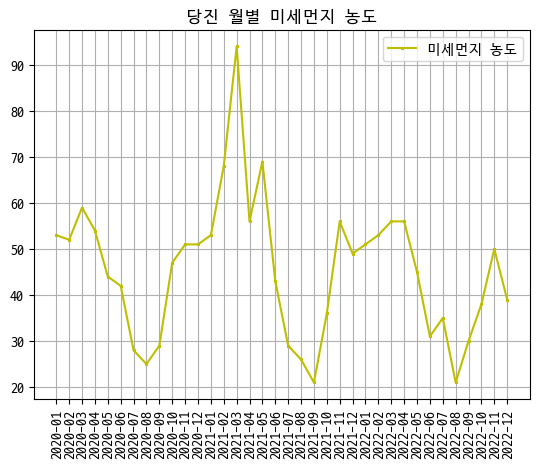

In [75]:
# 데이터프레임 생성
dangjin1
# '날짜' 열을 datetime 형식으로 변환
dangjin1['날짜'] = pd.to_datetime(dangjin1['날짜'])

# '날짜' 열을 '년-월' 형식으로 변환
dangjin1['년-월'] = dangjin1['날짜'].dt.to_period('M')

# '년-월'을 인덱스로 설정
dangjin1.set_index('년-월', inplace=True)

# 기존 index 열을 제거
dangjin1.drop(columns=['날짜'], inplace=True)

# 그래프 그리기
plt.plot(dangjin1.index.astype(str), dangjin1['미세먼지 농도'], color='y', marker='*', markersize=2, label='미세먼지 농도')
plt.xticks(rotation=90)
plt.title('당진 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
youngh = mimun[mimun['구분(2)'] == '인천광역시']
youngh

,구분(1),구분(2),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
4,인천광역시,인천광역시,42,37,41,39,31,32,21,24,...,42,44,32,21,26,21,26,30,41,38


In [24]:
youngh = youngh.iloc[:, 2:].copy()

In [25]:
youngh.reset_index(drop=True, inplace=True)

In [26]:
youngh1 = youngh.transpose().reset_index()

In [27]:
youngh1.columns = ['날짜', '미세먼지 농도']

In [28]:
youngh1

,날짜,미세먼지 농도
0,2020.01,42
1,2020.02,37
2,2020.03,41
3,2020.04,39
4,2020.05,31
5,2020.06,32
6,2020.07,21
7,2020.08,24
8,2020.09,20
9,2020.10,34


In [29]:
youngh1['미세먼지 농도'] = youngh1['미세먼지 농도'].astype(int)

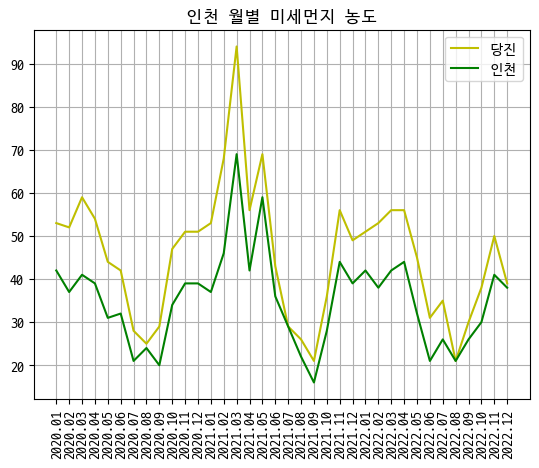

In [30]:
plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.xticks(youngh1['날짜'], rotation=90)
plt.title('인천 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

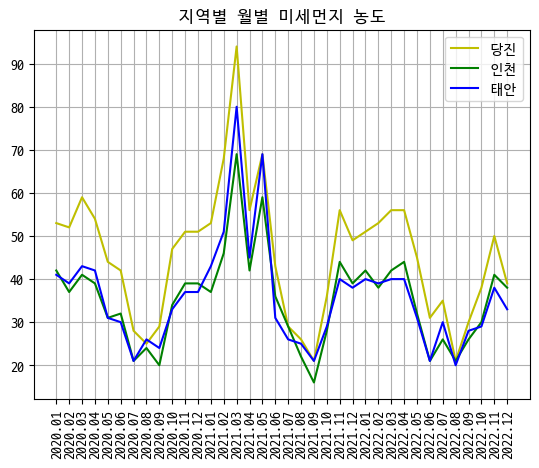

In [31]:
taan = mimun[mimun['구분(2)'] == '태안']
taan = taan.iloc[:, 2:].copy()
taan.reset_index(drop=True, inplace=True)
taan = taan.transpose().reset_index()
taan.columns = ['날짜', '미세먼지 농도']
taan['미세먼지 농도'] = taan['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.xticks(youngh1['날짜'], rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

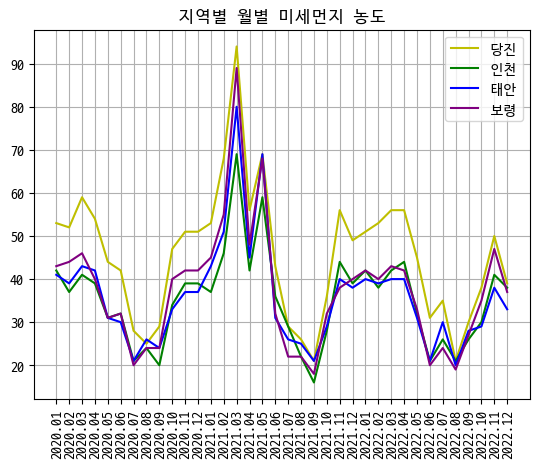

In [32]:
boyoung = mimun[mimun['구분(2)'] == '보령']
boyoung = boyoung.iloc[:, 2:].copy()
boyoung.reset_index(drop=True, inplace=True)
boyoung = boyoung.transpose().reset_index()
boyoung.columns = ['날짜', '미세먼지 농도']
boyoung['미세먼지 농도'] = boyoung['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.xticks(youngh1['날짜'], rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

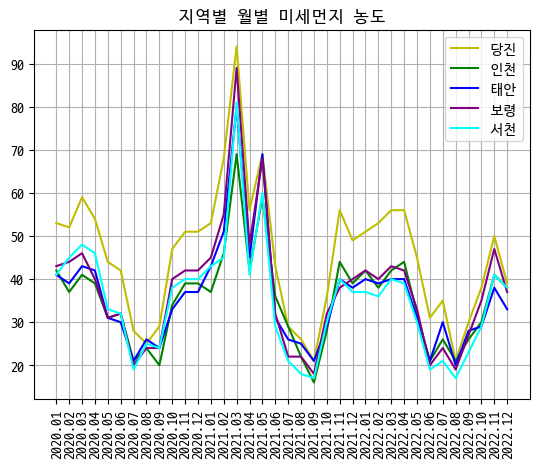

In [33]:
seuchan = mimun[mimun['구분(2)'] == '서천']
seuchan = seuchan.iloc[:, 2:].copy()
seuchan.reset_index(drop=True, inplace=True)
seuchan = seuchan.transpose().reset_index()
seuchan.columns = ['날짜', '미세먼지 농도']
seuchan['미세먼지 농도'] = seuchan['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.plot(seuchan['날짜'], seuchan['미세먼지 농도'], color='aqua', label='서천')
plt.xticks(youngh1['날짜'], rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
heanam = mimun[mimun['구분(2)'] == '해남']
heanam = heanam.iloc[:, 2:].copy()
heanam.reset_index(drop=True, inplace=True)
heanam = heanam.transpose().reset_index()
heanam.columns = ['날짜', '미세먼지 농도']
heanam['미세먼지 농도'] = heanam['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.plot(seuchan['날짜'], seuchan['미세먼지 농도'], color='aqua', label='서천')
plt.plot(heanam['날짜'], heanam['미세먼지 농도'], color='aqua', label='해남')
plt.xticks(rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

ValueError: invalid literal for int() with base 10: '19*'

In [35]:
heanam = mimun[mimun['구분(2)'] == '해남']

In [36]:
heanam = mimun[mimun['구분(2)'] == '해남']
heanam = heanam.iloc[:, 2:].copy()
heanam.reset_index(drop=True, inplace=True)
heanam = heanam.transpose().reset_index()
heanam.columns = ['날짜', '미세먼지 농도']
heanam['미세먼지 농도'] = heanam['미세먼지 농도'].replace('19*', '19')

In [37]:
heanam

,날짜,미세먼지 농도
0,2020.01,33
1,2020.02,33
2,2020.03,33
3,2020.04,36
4,2020.05,32
5,2020.06,27
6,2020.07,15
7,2020.08,26
8,2020.09,19
9,2020.10,34


In [ ]:
heanam.columns = ['날짜', '미세먼지 농도']

In [ ]:
heanam['미세먼지 농도'] = heanam['미세먼지 농도'].replace('19*', '19')

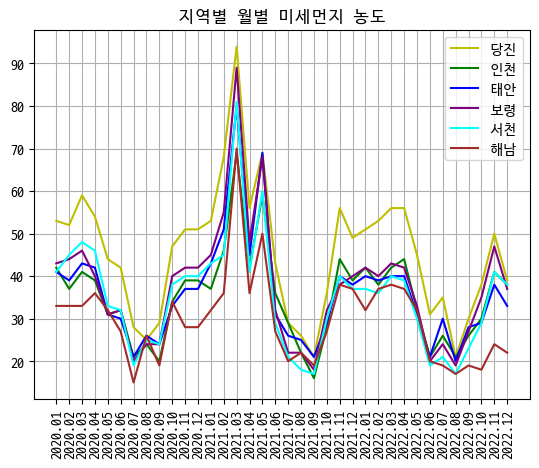

In [ ]:
heanam['미세먼지 농도'] = heanam['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.plot(seuchan['날짜'], seuchan['미세먼지 농도'], color='aqua', label='서천')
plt.plot(heanam['날짜'], heanam['미세먼지 농도'], color='brown', label='해남')
plt.xticks(rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

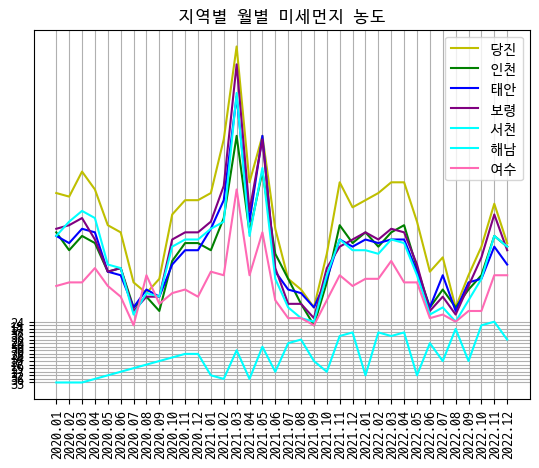

In [38]:
ysu = mimun[mimun['구분(2)'] == '여수']
ysu = ysu.iloc[:, 2:].copy()
ysu.reset_index(drop=True, inplace=True)
ysu = ysu.transpose().reset_index()
ysu.columns = ['날짜', '미세먼지 농도']
ysu['미세먼지 농도'] = ysu['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.plot(seuchan['날짜'], seuchan['미세먼지 농도'], color='aqua', label='서천')
plt.plot(heanam['날짜'], heanam['미세먼지 농도'], color='aqua', label='해남')
plt.plot(ysu['날짜'], ysu['미세먼지 농도'], color='hotpink', label='여수')
plt.xticks(rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

In [40]:
donghea = mimun[mimun['구분(2)'] == '동해']
donghea = donghea.iloc[:, 2:].copy()
donghea.reset_index(drop=True, inplace=True)
donghea = donghea.transpose().reset_index()
donghea.columns = ['날짜', '미세먼지 농도']
donghea

,날짜,미세먼지 농도
0,2020.01,21
1,2020.02,28
2,2020.03,30
3,2020.04,32
4,2020.05,27
5,2020.06,30
6,2020.07,16
7,2020.08,22
8,2020.09,21
9,2020.10,25


In [43]:
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].replace('26**', '26')
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].replace('25**', '25')
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].replace('24*', '24')
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].replace('-', '24')
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].replace('24**', '24')

In [44]:
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].astype(int)

In [ ]:
sachaun = mimun[mimun['구분(2)'] == '사천']
sachaun = sachaun.iloc[:, 2:].copy()
sachaun.reset_index(drop=True, inplace=True)
sachaun = sachaun.transpose().reset_index()
sachaun.columns = ['날짜', '미세먼지 농도']
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.plot(seuchan['날짜'], seuchan['미세먼지 농도'], color='aqua', label='서천')
plt.plot(heanam['날짜'], heanam['미세먼지 농도'], color='aqua', label='해남')
plt.plot(ysu['날짜'], ysu['미세먼지 농도'], color='hotpink', label='여수')
plt.plot(sachaun['날짜'], sachaun['미세먼지 농도'], color='navy', label='사천')
plt.xticks(rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

In [47]:
sachaun = mimun[mimun['구분(2)'] == '사천']
sachaun = sachaun.iloc[:, 2:].copy()
sachaun.reset_index(drop=True, inplace=True)
sachaun = sachaun.transpose().reset_index()
sachaun.columns = ['날짜', '미세먼지 농도']
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].replace('30*', '30')
sachaun

,날짜,미세먼지 농도
0,2020.01,32
1,2020.02,36
2,2020.03,31
3,2020.04,31
4,2020.05,28
5,2020.06,28
6,2020.07,16
7,2020.08,28
8,2020.09,22
9,2020.10,27


In [57]:
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].replace('26**', '26')
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].replace('25**', '25')
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].replace('24*', '24')
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].replace('-', '24')
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].replace('24**', '24')

In [ ]:
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].astype(int)

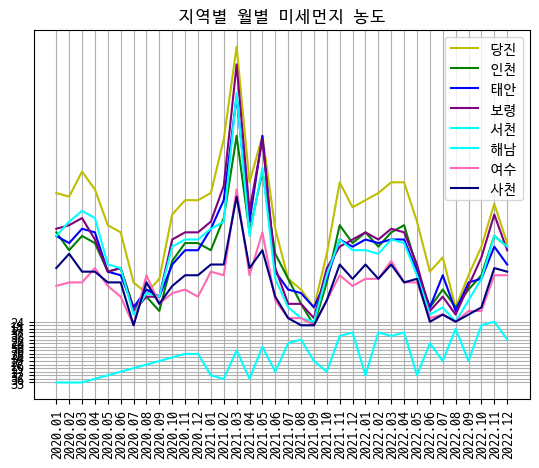

In [58]:
sachaun['미세먼지 농도'] = sachaun['미세먼지 농도'].astype(int)

plt.plot(dangjin1['날짜'], dangjin1['미세먼지 농도'], color='y', label='당진')
plt.plot(youngh1['날짜'], youngh1['미세먼지 농도'], color='g', label='인천')
plt.plot(taan['날짜'], taan['미세먼지 농도'], color='b', label='태안')
plt.plot(boyoung['날짜'], boyoung['미세먼지 농도'], color='purple', label='보령')
plt.plot(seuchan['날짜'], seuchan['미세먼지 농도'], color='aqua', label='서천')
plt.plot(heanam['날짜'], heanam['미세먼지 농도'], color='aqua', label='해남')
plt.plot(ysu['날짜'], ysu['미세먼지 농도'], color='hotpink', label='여수')
plt.plot(sachaun['날짜'], sachaun['미세먼지 농도'], color='navy', label='사천')
plt.xticks(rotation=90)
plt.title('지역별 월별 미세먼지 농도')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
hadong = mimun[mimun['구분(2)'] == '하동']
hadong = hadong.iloc[:, 2:].copy()
hadong.reset_index(drop=True, inplace=True)
hadong = hadong.transpose().reset_index()
hadong.columns = ['날짜', '미세먼지 농도']
hadong

,날짜,미세먼지 농도
0,2020.01,26
1,2020.02,31
2,2020.03,30*
3,2020.04,32
4,2020.05,31
5,2020.06,30
6,2020.07,20
7,2020.08,33
8,2020.09,19
9,2020.10,26


In [50]:
hadong['미세먼지 농도'] = hadong['미세먼지 농도'].replace('30*', '30')


In [51]:
hadong['미세먼지 농도'] = hadong['미세먼지 농도'].astype(int)

In [52]:
youndong = mimun[mimun['구분(2)'] == '영동']
youndong = youndong.iloc[:, 2:].copy()
youndong.reset_index(drop=True, inplace=True)
youndong = youndong.transpose().reset_index()
youndong.columns = ['날짜', '미세먼지 농도']

In [53]:
youndong['미세먼지 농도'] = youndong['미세먼지 농도'].replace('31**', '31')

In [54]:
youndong['미세먼지 농도'] = youndong['미세먼지 농도'].astype(int)

In [55]:
youndong

,날짜,미세먼지 농도
0,2020.01,41
1,2020.02,40
2,2020.03,42
3,2020.04,43
4,2020.05,33
5,2020.06,36
6,2020.07,16
7,2020.08,20
8,2020.09,20
9,2020.10,31


In [ ]:
donghea['미세먼지 농도'] = donghea['미세먼지 농도'].astype(int)

In [ ]:
mimun['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08',
    '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04',
    '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
    '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08',
    '2022.09', '2022.10', '2022.11', '2022.12'] = mimun['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08',
    '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04',
    '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
    '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08',
    '2022.09', '2022.10', '2022.11', '2022.12'].astype(int)

KeyError: ('2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12', '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12')

In [ ]:
mimun = mimun.groupby('구분(2)')[['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08',
    '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04',
    '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
    '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08',
    '2022.09', '2022.10', '2022.11', '2022.12']].mean()
mimun

TypeError: agg function failed [how->mean,dtype->object]